In [1]:
import builtins
original_print = print
def custom_print(*args, **kwargs):
    new_args = []
    for arg in args:
        if isinstance(arg, float):
            new_args.append(f'{arg:.10f}')
        else:
            new_args.append(arg)
    original_print(*new_args, **kwargs)
builtins.print = custom_print

In [2]:
# import pandas as pd

# max_efficiency_table = pd.read_csv('../hardwarelist/Bitcoin max updated2.csv')

# # Assuming the 'Date' column in max_efficiency_table is in a format that can be converted to datetime
# max_efficiency_table['date'] = pd.to_datetime(max_efficiency_table['date'])

# data = pd.read_csv('datasets/extracted/final3.csv')
# data["date"] = data["date"].apply(lambda x: x[:10])
# data2 = pd.read_csv('datasets/extracted/pre_2018.csv')
# data = pd.concat([data2[["date","row_index","hardware_name","TH/J"]], data[["date","row_index","hardware_name","TH/J"]]])

# def get_max_efficiency(date):
#     date = str(date)[:10]
#     try:
#         return max_efficiency_table[max_efficiency_table['date'] == date]['max (TH/J)'].values[0]
#     except:
#         return -1
    

# # delete rows where TH/J is larger than the max efficiency for that date
# data['max_efficiency'] = data['date'].apply(lambda x: get_max_efficiency(x))
# data = data[data['TH/J'] <= data['max_efficiency']*1.01]

# data.to_csv('datasets/extracted/merged.csv', index=False)

# # Convert the 'date' column to a datetime format
# data['date'] = pd.to_datetime(data['date'])

# # Extract year from the 'date' column and create a new column 'year'
# data['year'] = data['date'].dt.year

# data.to_csv('plotdata.csv', index=False)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from datetime import timedelta
warnings.filterwarnings('ignore')

# Define the variable name for the unit power efficiency column
unit_power_efficiency = 'TH/J'

# Load the data for the maximum efficiency for all dates
max_efficiency_table = pd.read_csv('../hardwarelist/Bitcoin max updated2.csv')

# Assuming the 'Date' column in max_efficiency_table is in a format that can be converted to datetime
max_efficiency_table['date'] = pd.to_datetime(max_efficiency_table['date'])

data = pd.read_csv('plotdata.csv') # date,row_index,hardware_name,TH/J,max_efficiency,year

# Convert the 'date' column to a datetime format
data['date'] = pd.to_datetime(data['date'])

# # Create a figure and axis
# fig, ax = plt.subplots(figsize=(12, 8), dpi=300)

# # Extract years from the data
# years = data['year'].unique()

# # Initialize lists to store yearly 'TH/J' values
# th_j_values = []

# # Create an empty array to store the regression lines
# regression_lines = []

# # Iterate over each year, calculate the slope, and store the data
# for year in years:
#     # Filter data for the current year
#     yearly_data = data[data['year'] == year]

#     # Calculate the mean 'TH/J' value for the year
#     th_j_mean = yearly_data[unit_power_efficiency].mean()

#     # Store the yearly 'TH/J' value
#     th_j_values.append(th_j_mean)

#     # Store the regression line for the year (point at the end of the year)
#     end_of_year_date = yearly_data['date'].max()
#     regression_lines.append((end_of_year_date, th_j_mean))

# # Create a DataFrame to store the yearly 'TH/J' values and regression points
# results = pd.DataFrame({'Year': years, unit_power_efficiency: th_j_values})

# plt.rcParams['font.family'] = 'Times New Roman'

# # Scatter plot for all data points
# plt.scatter(data['date'], data[unit_power_efficiency], c='gray', s=5, label='Data Points', alpha=0.5)

# # Plot the regression lines (one point per year)
# regression_dates, regression_th_j_values = zip(*regression_lines)
# plt.plot(regression_dates, regression_th_j_values, marker='o', linestyle='-', color='black', label=f'Yearly {unit_power_efficiency} Regression')

# # Plot the Hardware (TH/J) line
# plt.plot(max_efficiency_table['date'], max_efficiency_table['max (TH/J)'], color='gray', label='Max possible (TH/J)', linewidth=2)

# plt.yscale('log')  # Set the y-axis to a logarithmic scale base 10


# plt.xlabel('Date', fontname='Times New Roman', fontsize=12)
# plt.ylabel('Power Efficiency (' + unit_power_efficiency + ')', fontname='Times New Roman')
# # plt.title(f'Yearly-Updated {unit_power_efficiency} with Data Points and Max Efficiency', fontname='Times New Roman')
# plt.legend(loc='upper left')

# # Enable minor ticks
# plt.minorticks_on()

# # Add major grid to the plot
# plt.grid(True, which='major', axis='both', linestyle='-', linewidth=0.5, color='gray', alpha=0.7)

# # Add minor grid to the plot with a lighter style
# plt.grid(True, which='minor', axis='both', linestyle=':', linewidth=0.25, color='gray', alpha=0.7)

# plt.yticks()

# plt.savefig('high_res_plot.png', dpi=300)
# plt.show()

                            OLS Regression Results                            
Dep. Variable:                   TH/J   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     281.6
Date:                Wed, 15 Nov 2023   Prob (F-statistic):           3.02e-69
Time:                        11:54:02   Log-Likelihood:                 610.09
No. Observations:                 123   AIC:                            -1204.
Df Residuals:                     115   BIC:                            -1182.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0070      0.003     -2.127      

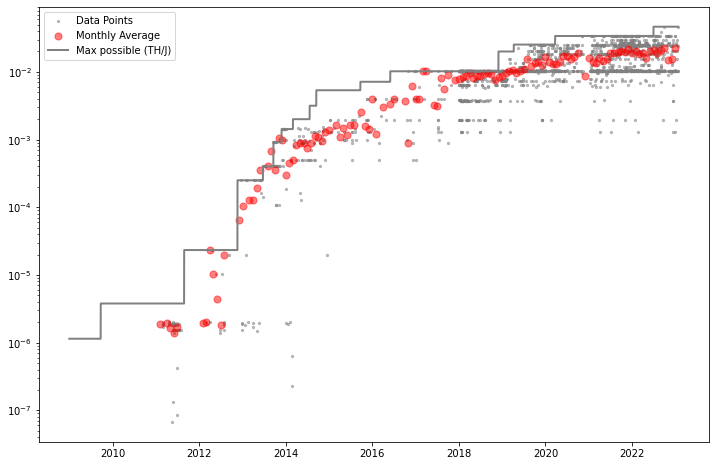

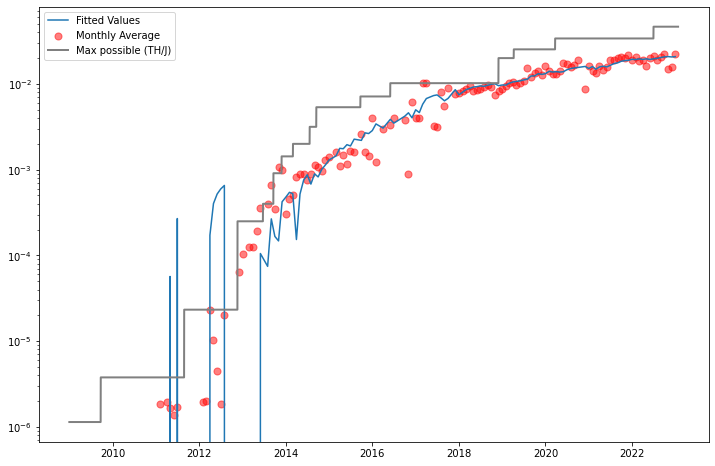

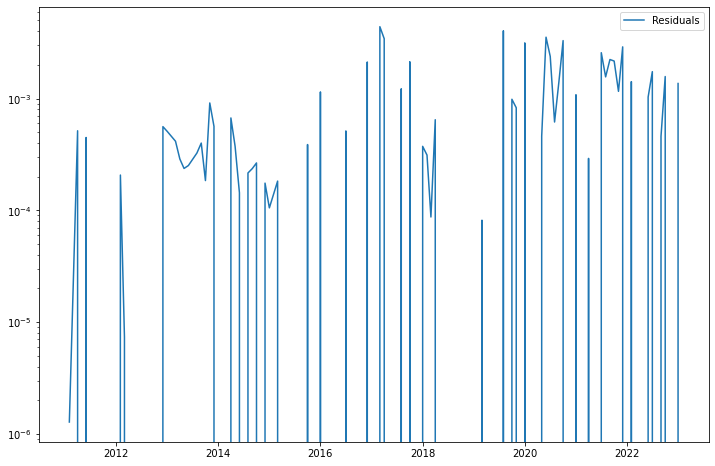

In [4]:
# econometrics

# Step 1: Average the data points on a monthly basis
# Ensure that 'TH/J' is a numeric type
data['TH/J'] = pd.to_numeric(data['TH/J'], errors='coerce')

# Create a 'month' column by offsetting the 'date' by 15 days and then using to_period
data['month'] = (data['date'] - timedelta(days=15)).dt.to_period('M')

# Group by 'month' and calculate the mean of 'TH/J'
monthly_data = data.groupby('month')['TH/J'].mean().reset_index()

# Convert 'month' back to datetime (first day of the month)
monthly_data['month'] = monthly_data['month'].dt.to_timestamp()

# Step 2: Create a time series for power efficiency
# Create the time variable t (in months)
monthly_data['t'] = np.arange(len(monthly_data))

# Then, create t^2
monthly_data['t_squared'] = monthly_data['t'] ** 2

# Get the maximum power efficiency over time
def get_max_efficiency(date):
    date = str(date)[:10]
    try:
        return max_efficiency_table[max_efficiency_table['date'] == date]['max (TH/J)'].values[0]
    except:
        return -1
monthly_data['P_max_t'] = monthly_data['month'].apply(lambda x: get_max_efficiency(x))

# Create the log of P_max_t
monthly_data['log_P_max_t'] = np.log(monthly_data['P_max_t'])

# Convert 't' to float to avoid issues with negative powers
monthly_data['t'] = monthly_data['t'].astype(float)

# Handle the case when t is zero to avoid division by zero
monthly_data.loc[monthly_data['t'] == 0, 't'] = np.nan

# Create the fractional power of t for the ARMA term
for i in range(1, 11):  # Start from 1 to avoid division by zero
    monthly_data[f't_inv_{i}'] = monthly_data['t'] ** -i

# Replace NaN values with a large number to simulate infinity
monthly_data = monthly_data.fillna(1e9)

# Create the AR(l)MA(l) term
# Here, we use the ARIMA model with l=10
# Note: ARIMA requires a univariate time series, so we only pass 'TH/J'
model = ARIMA(monthly_data['TH/J'], order=(10,0,10))
model_fit = model.fit()

# Add the AR(l)MA(l) term to the data
for i in range(1, 11):
    monthly_data[f'ARMA_{i}'] = model_fit.fittedvalues * monthly_data[f't_inv_{i}']

# Now, we can create the time series for power efficiency
X = monthly_data[['t', 't_squared', 'log_P_max_t'] + [f'ARMA_{i}' for i in range(1, 11)]]
X = sm.add_constant(X)  # Add a constant term to the predictors
y = monthly_data['TH/J']

# Step 3: Apply the Ordinary Least Squares Method (OLS)
model = sm.OLS(y, X)
results = model.fit()

# Print out the statistics
print(results.summary())

# Print out the coefficients
print("Alpha (intercept):", results.params[0])
print("Beta coefficients:", results.params[1:])


# Step 4: Plot single point for each month + all the data points
plt.figure(figsize=(12, 8))
plt.scatter(data['date'], data[unit_power_efficiency], c='gray', s=5, label='Data Points', alpha=0.5)
plt.scatter(monthly_data['month'], monthly_data['TH/J'], c='red', s=50, label='Monthly Average', alpha=0.5)  # Corrected line
plt.plot(max_efficiency_table['date'], max_efficiency_table['max (TH/J)'], color='gray', label='Max possible (TH/J)', linewidth=2)
plt.yscale('log')
plt.legend()
plt.show()

# Step 5: Plot P_eff,t(t) + Single point for each month, excluding the first month from the fitted line
plt.figure(figsize=(12, 8))
# Exclude the first month from the fitted values line
plt.plot(monthly_data['month'][1:], results.fittedvalues[1:], label='Fitted Values')
plt.scatter(monthly_data['month'], monthly_data['TH/J'], c='red', s=50, label='Monthly Average', alpha=0.5)
plt.plot(max_efficiency_table['date'], max_efficiency_table['max (TH/J)'], color='gray', label='Max possible (TH/J)', linewidth=2)
plt.yscale('log')
plt.legend()
plt.show()

# Step 6: Plot with just the residual term
plt.figure(figsize=(12, 8))
plt.plot(monthly_data['month'], results.resid, label='Residuals')
plt.yscale('log')
plt.legend()
plt.show()

In [5]:
# # looks like:
# # [
# #  (Timestamp('2011-08-04 00:00:00'), 1.9952745454545455e-06),
# #  (Timestamp('2012-12-31 00:00:00'), 3.2042489473684216e-05),
# #  (Timestamp('2013-12-21 00:00:00'), 0.0005635879322033898)
# # ]
# regression_lines

NameError: name 'regression_lines' is not defined

In [ ]:
# df = pd.DataFrame(columns=['date', 'max possible', 'archaicity', 'max found', 'regression'])
# df['date'] = max_efficiency_table['date']
# df['max possible'] = max_efficiency_table['max (TH/J)']
# df['archaicity'] = max_efficiency_table['archaicity (TH/J)']


# # finds the 2 closest timestamps in regression_lines and returns the interpolated value
# def get_regression(date):
#     closest_smaller_timestamp_index = None
#     closest_larger_timestamp_index = None
#     for (i,(timestamp, value)) in enumerate(regression_lines):
#         if timestamp <= date:
#             closest_smaller_timestamp_index = i
#         else:
#             closest_larger_timestamp_index = i
#             break
    
#     if closest_smaller_timestamp_index is None:
#         return regression_lines[0][1]
#     elif closest_larger_timestamp_index is None:
#         return regression_lines[-1][1]
    
#     smaller_value = regression_lines[closest_smaller_timestamp_index][1]
#     larger_value = regression_lines[closest_larger_timestamp_index][1]

#     # interpolate
#     return smaller_value + (larger_value - smaller_value) * (date - regression_lines[closest_smaller_timestamp_index][0]) / (regression_lines[closest_larger_timestamp_index][0] - regression_lines[closest_smaller_timestamp_index][0])

     
# df['regression'] = df['date'].apply(get_regression)

# # gets the max efficiency for a given date from the data table
# def get_max_efficiency(date):
#     return data[data['date'] == date][unit_power_efficiency].max()

# df['max found'] = df['date'].apply(get_max_efficiency)

In [ ]:
# df.sample(30)

,date,max possible,archaicity,max found,regression
3764,2019-04-23,0.025300,0.010200,NaN,0.009500
2541,2015-12-17,0.007140,0.005350,NaN,0.001665
4862,2022-04-25,0.033900,0.033900,NaN,0.018133
895,2011-06-15,0.000004,0.000001,NaN,0.000002
3910,2019-09-16,0.025300,0.025300,NaN,0.010721
1666,2013-07-25,0.000400,0.000023,NaN,0.000314
4175,2020-06-07,0.033900,0.025300,0.010305,0.013378
2525,2015-12-01,0.007140,0.005350,NaN,0.001609
4275,2020-09-15,0.033900,0.033900,NaN,0.014488
4131,2020-04-24,0.033900,0.025300,0.010204,0.012889


In [ ]:
# df.to_csv('plot.csv', index=False)